# FIFA19 Explanatory Data Analysis


![](http://i.imgur.com/EzhxngF.jpg)

What will you will find in this Kernel
- Q 1. Average, maximum and minimum players count.
- Q 2. Age vs Potential
- Q 3. Average potential by age
- Q 4. Players joinee as per year
- Q 5. Players joinee as per month
- Q 6. Height and dribblling
- Q 7. FK Accuracy and Heading Accuracy
- Q 8. Lefty and Righty player
- Q 9. Valid contracts
- Q 10. Overall aggrassion

In [1]:
# importing libraries
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading dataset
df_data = pd.read_csv('../input/data.csv')
df_data.head() #printing values in dataset

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df_data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
def display_graph(ax, title, xlabel, ylabel, legend):
    '''
    Graph theme will be same throught the kernel
    '''
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=18, fontweight='bold')
    plt.legend(legend)
    plt.show()

##### Q 1. Average, maximum and minimum players count.

In [5]:
print('In the age column there is total {} number of players and in dataset there is {} number of null in Age. Also in that data the mean (average age) is {}, maximum age is {}, and minimum age is {}, containing total {} numbers of countries. Now, lets display the other data related information based on Age.'.format(df_data['Age'].sum(), df_data['Age'].isna().sum(), format(df_data['Age'].mean(), '.2f'), df_data['Age'].max(), df_data['Age'].min(), len(df_data['Nationality'].unique())))

In the age column there is total 457400 number of players and in dataset there is 0 number of null in Age. Also in that data the mean (average age) is 25.12, maximum age is 45, and minimum age is 16, containing total 164 numbers of countries. Now, lets display the other data related information based on Age.


In [6]:
print('This dataset have {} players having age 16 and {} players who has age more than 42'.format(sum((df_data['Age'] == 16)),sum(df_data['Age'] >= 40)))

This dataset have 42 players having age 16 and 22 players who has age more than 42


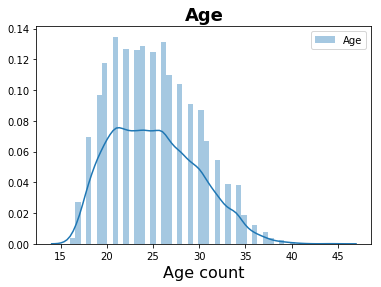

In [7]:
ax = sns.distplot(df_data[['Age']])
display_graph(ax, 'Age', 'Age count', '', ['Age'])

###### Insights:
From above graph, we can see that average players count are between 21 to 27. There are sudden rise between players 15 to 21, it means that there are less number of players between this ages. But at the tail side, we can see that graph is slowly descreasing, so the players age are slightly decreasing reaching to the age 45

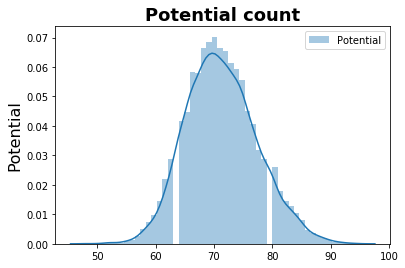

In [8]:
ax = sns.distplot(df_data[['Potential']])
display_graph(ax, 'Potential count', 'Potential', '', ['Potential'])

##### Q 2. Age vs Potential

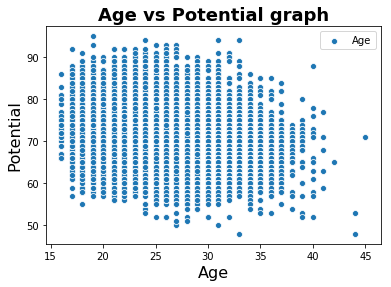

In [9]:
ax = sns.scatterplot(x = 'Age', y='Potential', data=pd.DataFrame(df_data, columns=['Age', 'Potential']))
display_graph(ax, 'Age vs Potential graph', 'Age', 'Potential', ['Age'])

###### Insights
As we can see in this graph, it is clear that there data scattered in the plot above age 40 are very less, it also do not have higher potential. Calculating the average, those players who has age between 20 to 30, can have perform more better than any other ages of players.

In [10]:
df_age = pd.DataFrame(df_data, columns=['Name', 'Age', 'Potential', 'Nationality'])
df_age.sort_values(by='Age').head()

,Name,Age,Potential,Nationality
18206,G. Nugent,16,66,England
17743,J. Olstad,16,69,Norway
13293,H. Massengo,16,75,France
16081,J. Italiano,16,79,Australia
18166,N. Ayéva,16,72,Sweden


In [11]:
df_age.sort_values(by='Age').tail()

,Name,Age,Potential,Nationality
12192,H. Sulaimani,41,63,Saudi Arabia
10545,S. Narazaki,42,65,Japan
18183,K. Pilkington,44,48,England
17726,T. Warner,44,53,Trinidad & Tobago
4741,O. Pérez,45,71,Mexico


###### Insights
This is age distribution, of younger and older player as per country wise. To check which country have the youngest and oldest players. So Maxico have the oldest player, named as O. Perez.

##### Q 3. Average potential by age

In [48]:
df_age.groupby('Age', as_index=False).count().head(5)

,Age,Name,Potential,Nationality
0,16,42,42,42
1,17,289,289,289
2,18,732,732,732
3,19,1024,1024,1024
4,20,1240,1240,1240


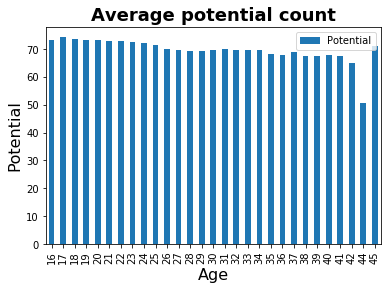

In [12]:
ax = df_age.groupby('Age').mean().plot.bar()
display_graph(ax, 'Average potential count', 'Age', 'Potential', ['Potential'])

##### Insights
Again there is plot of average age and potential graph. To plot it in bar chart, to check the overall potential score. We can see that those player have age 44 have less potential and those who have age 45 have higher potential. But again, We are considered mean value. This plot contains, overall performance based on age.

##### 4. Players Joinee as per year

In [14]:
df_joined = df_data['Joined']

In [15]:
df_joined.isna().sum()

1553

In [16]:
df_joined.dropna(inplace = True)

In [17]:
df_joined = df_joined.apply(lambda x: datetime.strptime(x, '%b %d, %Y'))

In [18]:
# get the list of years
df_year = df_joined.apply(lambda x: x.year)

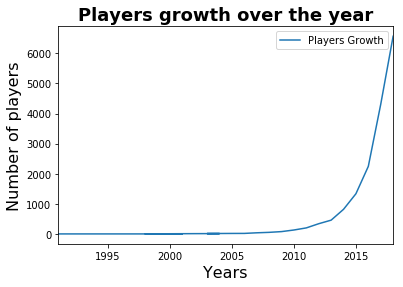

In [19]:
ax = df_year.value_counts().plot()
display_graph(ax, 'Players growth over the year', 'Years', 'Number of players', ['Players Growth'])

##### Insights
As we can see in the graph, based on data there are sudden rise of fifa player after the year 2014. Other things are self explanatory. Isn't it? :smile:

##### Q 5. Players joinee as per month

In [20]:
df_month = df_joined.apply(lambda x: x.month)

In [21]:
df_month.sort_values(ascending = True, inplace=True)

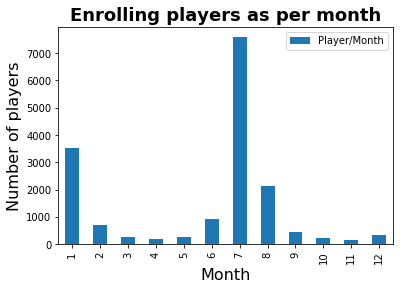

In [22]:
ax = df_month.value_counts(sort = False).plot.bar()
display_graph(ax, 'Enrolling players as per month', 'Month', 'Number of players', ['Player/Month'])

##### Insights
So, coming to the year wise enrollment. In july month there are sudden rise enrollment of players, and in April,  November have the lowest value of forms to enroll the players.

##### Q 6. Height and dribblling

In [23]:
df_height = pd.DataFrame(df_data, columns=['Height', 'Weight', 'Strength', 'Aggression', 'Stamina', 'Dribbling'])

In [24]:
df_height.corr()

,Strength,Aggression,Stamina,Dribbling
Strength,1.000000,0.474120,0.262694,-0.033550
Aggression,0.474120,1.000000,0.645687,0.441075
Stamina,0.262694,0.645687,1.000000,0.686511
Dribbling,-0.033550,0.441075,0.686511,1.000000


In [25]:
df_height.describe()

,Strength,Aggression,Stamina,Dribbling
count,18159.000000,18159.000000,18159.000000,18159.000000
mean,65.311967,55.868991,63.219946,55.371001
std,12.557000,17.367967,15.894741,18.910371
min,17.000000,11.000000,12.000000,4.000000
25%,58.000000,44.000000,56.000000,49.000000
50%,67.000000,59.000000,66.000000,61.000000
75%,74.000000,69.000000,74.000000,68.000000
max,97.000000,95.000000,96.000000,97.000000


##### Q 7. FK Accuracy and Heading Accuracy

In [26]:
accuracy = pd.DataFrame(df_data, columns=['HeadingAccuracy', 'FKAccuracy'])

In [27]:
accuracy.head()

,HeadingAccuracy,FKAccuracy
0,70.0,94.0
1,89.0,76.0
2,62.0,87.0
3,21.0,19.0
4,55.0,83.0


##### Q 8. Lefty and Righty player

In [28]:
prefered_type = df_data['Preferred Foot'].value_counts()
prefered_type

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [49]:
sum(df_data['Preferred Foot'].isnull())

48

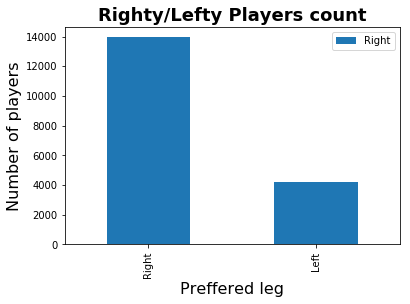

In [29]:
ax = prefered_type.plot.bar()
display_graph(ax, 'Righty/Lefty Players count', 'Preffered leg', 'Number of players', ['Right', 'Left'])

##### Insights
We have total 48 empty values in preferred foot other than that, you can see in graph that we have almost 14000 (precisely 13948) players who is righty and above 4000 (accuratly 4211) lefty players. Now let's plot this players as which country has more lefty/righty players

##### Q 9. Valid contracts

In [36]:
df_data['Contract Valid Until'].value_counts().head(10)

2019            4819
2021            4360
2020            4027
2022            1477
2023            1053
Jun 30, 2019     931
2018             886
Dec 31, 2018     144
May 31, 2019      60
Jan 1, 2019       51
Name: Contract Valid Until, dtype: int64

In [37]:
df_contract = pd.DataFrame(df_data, columns=['Contract Valid Until'])

In [38]:
df_contract.dropna(inplace = True)

In [39]:
def get_only_year(dates):
    '''
    some of the date in this df contains 21 Jul, 2018 and some have only names
    so, getting only years value
    '''
    newDates = []
    for i, date in enumerate(dates):
        if(len(date)>4):
            date = date[-4:]
        newDates.append(date)
    return newDates

In [40]:
df_contract_valid = get_only_year(df_contract['Contract Valid Until'])

In [41]:
df_contract_valid = pd.Series(df_contract_valid)

In [42]:
len(df_contract_valid.unique())

9

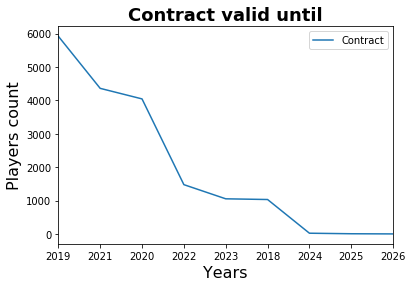

In [43]:
ax = df_contract_valid.value_counts().plot()
display_graph(ax, 'Contract valid until', 'Years', 
             'Players count', ['Contract'])

##### Insights
As per the data, above 5800 players' contract ending in the 2019. In 2021, it decreses to 4100/4200, then there is slightly drop to 4000 in year 2023 and massive drop of contract occurs at 2022 upto 1500.

##### Q 10. Overall aggrassion

In [44]:
f = (df_data
         .loc[df_data['Position'].isin(['ST', 'GK'])]
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']]
    )
f = f[f["Overall"] >= 80]
f = f[f["Overall"] < 85]
f['Aggression'] = f['Aggression'].astype(float)

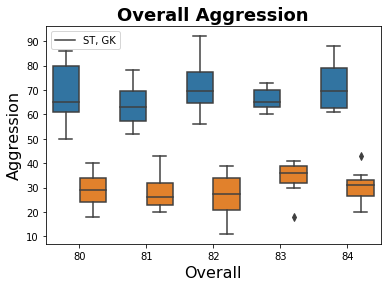

In [45]:
ax = sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f)
display_graph(ax, 'Overall Aggression', 'Overall', 'Aggression', ['ST, GK'])

### Conclusion
So, in this dataset, I have explained the rows related to age, potential, accuracy, contract and the preffered type of the player and many more. Major explaination is described in the insights of the charts. This data can be further explained with showing the information of the data as per the country and club wise.

--------------------------

~If you like this kernel please give star to it. Also, follow me on [Twitter](https://twitter.com/krunal3kapadiya) or [Medium](https://medium.com/@krunal3kapadiya) for more updates. You can also check my website https://krunal3kapadiya.app ~